In [2]:
import pandas as pd
import numpy as np
import xarray as xr
import geopandas as gpd
import geoviews as gv

In [3]:
path   = "/Users/rodrigo/Downloads/"
path_clim = "../share/Climate/"
temp = xr.open_dataset(path_clim + "Extreme_temperature_2040_2059_SSP245.nc")
pre = xr.open_dataset(path_clim + "Extreme_rainfall_2040_2059_SSP245.nc")
hurr = xr.open_dataset(path_clim + "Hurricane_2040_2059_SSP245.nc")

temp_pre_hurr = temp["Hotspots"] * pre["Hotspots"] * hurr["Hotspots"]
temp_pre      = temp["Hotspots"] * pre["Hotspots"]
pre_hurr      =                    pre["Hotspots"] * hurr["Hotspots"]
temp_hurr     = temp["Hotspots"]                   * hurr["Hotspots"]
temp_pre_hurr.rio.to_raster( path + "temp_pre_hurr.tif" )
temp_pre.rio.to_raster(      path + "temp_pre.tif"      )
pre_hurr.rio.to_raster(      path + "pre_hurr.tif"      )
temp_hurr.rio.to_raster(     path + "temp_hurr.tif"     )
subs = temp_pre_hurr + temp_pre + pre_hurr + temp_hurr
( temp["Hotspots"] - subs ).rio.to_raster( path + "temp.tif" )
(  pre["Hotspots"] - subs ).rio.to_raster( path + "pre.tif"  )
( hurr["Hotspots"] - subs ).rio.to_raster( path + "hurr.tif" )

In [8]:
path   = "/Users/rodrigo/Downloads/"
f_name = "GHS_BUILT_S_E2025_GLOBE_R2023A_54009_100_V1_0_R8_C23"

#ds = xr.open_dataset(f"{path}{f_name}/{f_name}.tif")
ds = xr.open_dataset(f"{path}a.tif")
ds

<xarray.Dataset> Size: 470MB
Dimensions:      (band: 1, x: 12586, y: 9341)
Coordinates:
  * band         (band) int64 8B 1
  * x            (x) float64 101kB 39.75 39.75 39.75 39.75 ... 50.74 50.74 50.74
  * y            (y) float64 75kB 16.26 16.26 16.26 16.26 ... 8.101 8.1 8.099
    spatial_ref  int64 8B ...
Data variables:
    band_data    (band, y, x) float32 470MB ...

:Image   [x,y]   (band_data)
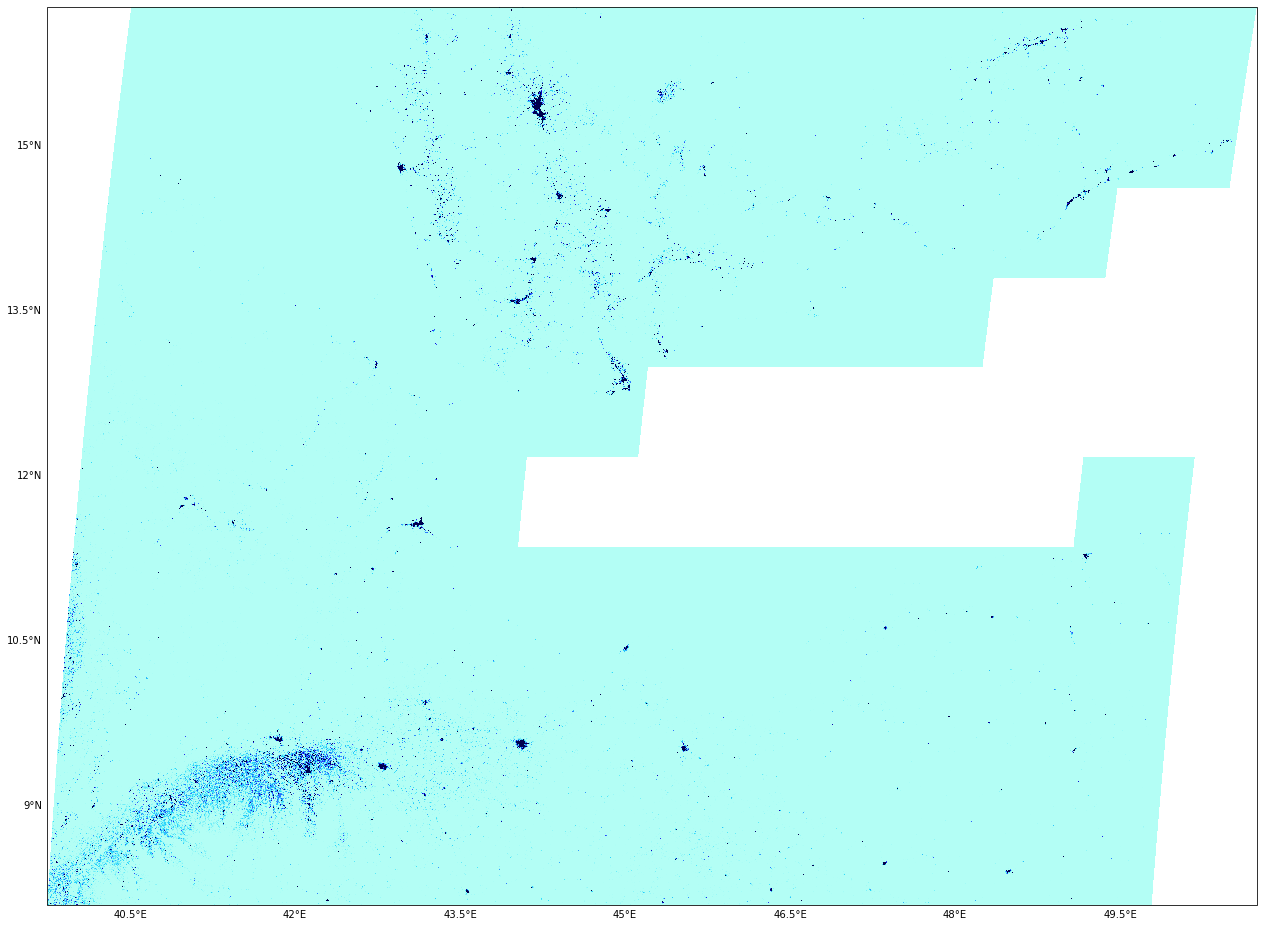

In [9]:
min_v, max_v = 0, 1000
map = gv.Image( gv.Dataset( ds, ["x", "y"],
        vdims = gv.Dimension("band_data", range = ( min_v, max_v ) ) )
        )#.opts( cmap = cmap, **options )
#map = ( v_map_h * ocean * countries ).opts( **options_m )
gv.output( map, size = 600 )